# Avito - Stage 1 Data Exploration 

In [1]:
import pandas as pd
import numpy as np
import os
import json
import pickle

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import lightgbm as lgb

## General Setup:

In [2]:
# Load parameters file
with open('setup_param.json', 'r') as handle:
    setup_params = json.load(handle)

In [3]:
parent_path = setup_params['parent_dir']
data_path = setup_params['data_dir']
scripts_path = setup_params['scripts_dir']
train_csv_path = setup_params['train_csv']
test_csv_path = setup_params['test_csv']

# Training and test sets
labels_path = setup_params['train_labels']
train_data_path = setup_params['stage0_train']

test_data_path = setup_params['stage0_test']
test_items_path = setup_params['test_items']

## Exploration Goal:
With the Stage 0 model complete, the challenge is to now focus on the data pipeline structure. A clear exploit that can be utilized is the fact that most of the training data have "0" deal probabilities. This means that the first model in the Stage 1 model should most likely be a binary classifier. 

From this first model, things become much murkier. However, looking the Feature Importance plots created using the LightGBM API, it is clear that the "image_top_1" feature is the most important feature of the ones generated during Stage 0 preprocessing. I will be focusing my efforts on looking into that feature.

### Verifying Distribution of Training Labels:

In [4]:
train_labels = pd.read_csv(labels_path)

In [5]:
print 'Percentage of 0 in training labels:', train_labels.deal_prob.value_counts().loc[0]/float(train_labels.shape[0])

Percentage of 0 in training labels: 0.6482655591503129


### Looking at image_top_1 Distribution:

In [6]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

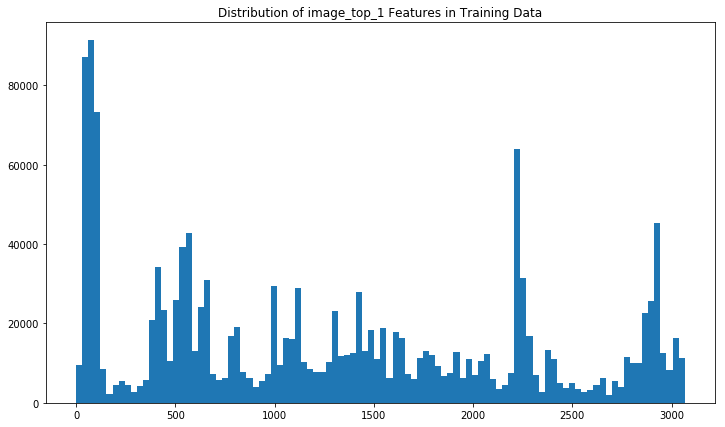

In [7]:
train.image_top_1.hist(bins=100, figsize=(12, 7), grid=False)
plt.title('Distribution of image_top_1 Features in Training Data')
plt.show()

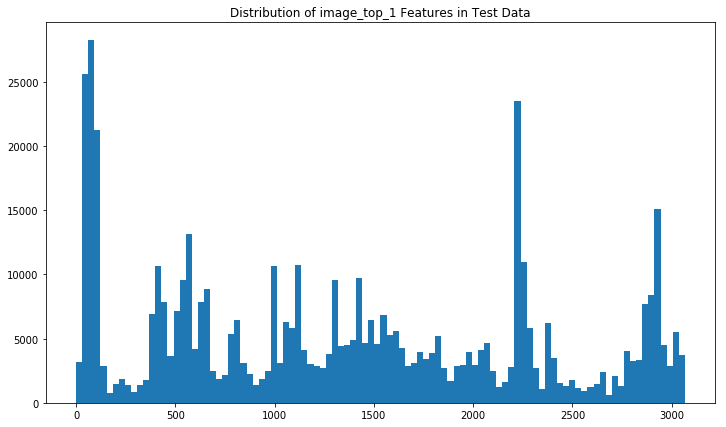

In [8]:
test.image_top_1.hist(bins=100, figsize=(12, 7), grid=False)
plt.title('Distribution of image_top_1 Features in Test Data')
plt.show()

Looking at the two distributions above, it can be seen that train and test data share similar structures in their distribution of "image_top_1" features. Using the information from these two plots, I will be structuring my model to be training on splits of:
* Below 250
* Between 250 - 2000
* Between 2000 - 2500
* Above 2500